In [1]:
import math
import time


In [2]:
cities = {
 1: (565.0, 575.0),
 2: (25.0, 185.0),
 3: (345.0, 750.0),
 4: (945.0, 685.0),
 5: (845.0, 655.0),
 6: (880.0, 660.0),
 7: (25.0, 230.0),
 8: (525.0, 1000.0),
 9: (580.0, 1175.0),
 10: (650.0, 1130.0),
 11: (1605.0, 620.0),
 12: (1220.0, 580.0),
 13: (1465.0, 200.0),
 14: (1530.0, 5.0),
 15: (845.0, 680.0),
 16: (725.0, 370.0),
 17: (145.0, 665.0),
 18: (415.0, 635.0),
 19: (510.0, 875.0),
 20: (560.0, 365.0),
 21: (300.0, 465.0),
 22: (520.0, 585.0),
 23: (480.0, 415.0),
 24: (835.0, 625.0),
 25: (975.0, 580.0),
 26: (1215.0, 245.0),
 27: (1320.0, 315.0),
 28: (1250.0, 400.0),
 29: (660.0, 180.0),
 30: (410.0, 250.0),
 31: (420.0, 555.0),
 32: (575.0, 665.0),
 33: (1150.0, 1160.0),
 34: (700.0, 580.0),
 35: (685.0, 595.0),
 36: (685.0, 610.0),
 37: (770.0, 610.0),
 38: (795.0, 645.0),
 39: (720.0, 635.0),
 40: (760.0, 650.0),
 41: (475.0, 960.0),
 42: (95.0, 260.0),
 43: (875.0, 920.0),
 44: (700.0, 500.0),
 45: (555.0, 815.0),
 46: (830.0, 485.0),
 47: (1170.0, 65.0),
 48: (830.0, 610.0),
 49: (605.0, 625.0),
 50: (595.0, 360.0),
 51: (1340.0, 725.0),
 52: (1740.0, 245.0)}

In [3]:
# Function to calculate the distance between two cities
def distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

# Nearest neighbor algorithm
def nearest_neighbor(cities):
    unvisited = set(cities.keys())
    current = next(iter(unvisited))
    unvisited.remove(current)
    tour = [current]

    while unvisited:
        nearest = min(unvisited, key=lambda city: distance(cities[current], cities[city]))
        tour.append(nearest)
        unvisited.remove(nearest)
        current = nearest

    # Return to the starting point to complete the circuit
    tour.append(tour[0])
    return tour

# Function to calculate the total length of the tour
def tour_length(tour, cities):
    total_distance = 0
    for i in range(len(tour) - 1): # Adjust to len(tour)-1 to account for the return to start
        total_distance += distance(cities[tour[i]], cities[tour[i + 1]])
    return total_distance

In [4]:
start_time = time.time()

# Calculate the tour
tour = nearest_neighbor(cities)

# Calculate the length of the tour
length = tour_length(tour, cities)
length

end_time = time.time()


time_taken = end_time - start_time

In [5]:
print(f"Total tour length: {length}")
print(f"Time taken: {time_taken} seconds")
print(tour)

Total tour length: 8980.918279329191
Time taken: 0.0010983943939208984 seconds
[1, 22, 49, 32, 36, 35, 34, 39, 40, 38, 37, 48, 24, 5, 15, 6, 4, 25, 46, 44, 16, 50, 20, 23, 31, 18, 3, 19, 45, 41, 8, 10, 9, 43, 33, 51, 12, 28, 27, 26, 47, 13, 14, 52, 11, 29, 30, 21, 17, 42, 7, 2, 1]


# Rysunek

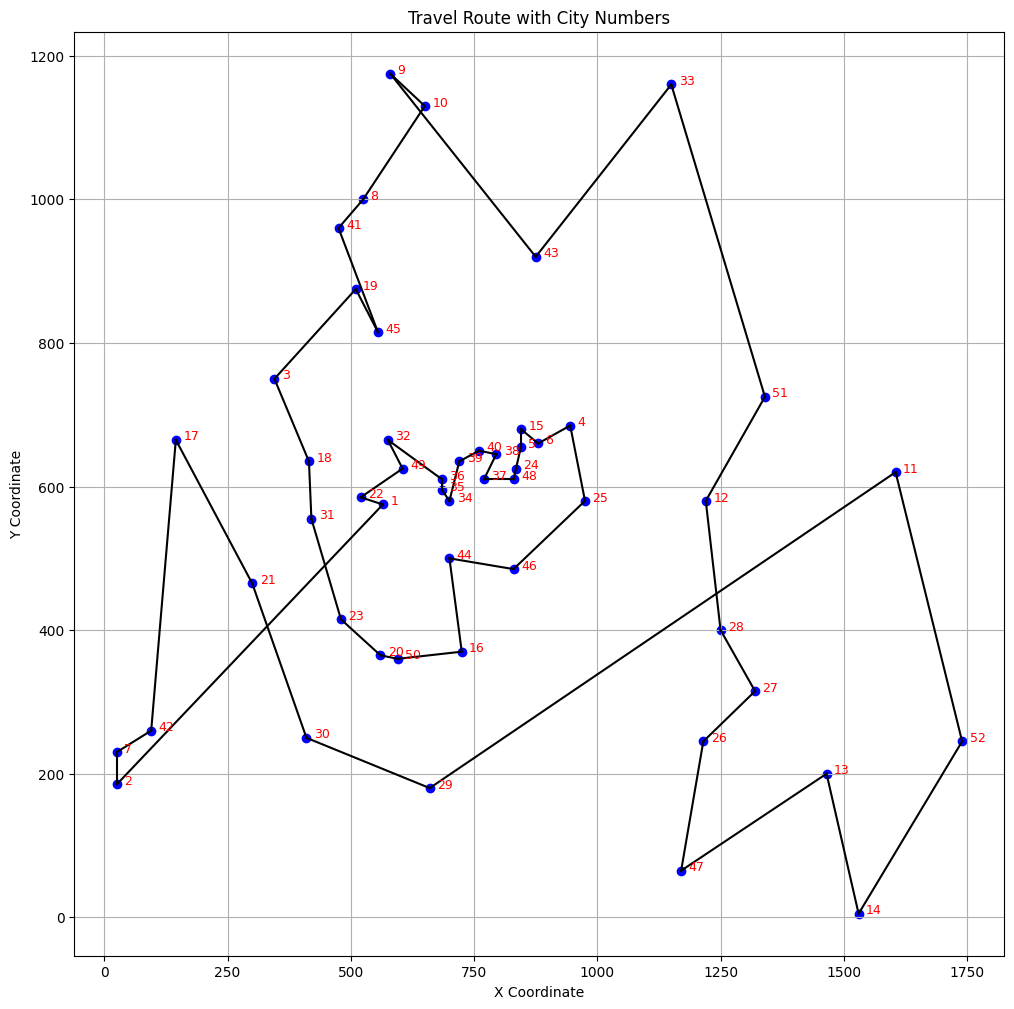

In [6]:
import matplotlib.pyplot as plt



# Define the tour across all clusters
tour = [1, 22, 49, 32, 36, 35, 34, 39, 40, 38, 37, 48, 24, 5, 15, 6, 4, 25, 46, 44, 16, 50, 20, 23, 31, 18, 3, 19, 45, 41, 8, 10, 9, 43, 33, 51, 12, 28, 27, 26, 47, 13, 14, 52, 11, 29, 30, 21, 17, 42, 7, 2, 1]

# Re-plotting with the provided tour and city numbering
plt.figure(figsize=(12, 12))
for city, coord in cities.items():
    plt.scatter(coord[0], coord[1], c='blue')  # plot points
    plt.text(coord[0] + 15, coord[1], str(city), color='red', fontsize=9)  # label cities

# Draw lines connecting the points based on the provided route
for i in range(len(tour)-1):
    start = cities[tour[i]]
    end = cities[tour[i+1]]
    plt.plot([start[0], end[0]], [start[1], end[1]], 'k-')  # black lines for route

plt.title('Travel Route with City Numbers')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.savefig('NN-52Berlin.png')
plt.show()